# EDA

In [ ]:
# Reset matplotlib configuration
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Set up matplotlib backend
# %matplotlib inline

In [ ]:
# import matplotlib
# # matplotlib.use('Agg')  # Use the Agg backend
# import matplotlib.pyplot as plt
# import seaborn as sns
# import plotly.express as px

In [ ]:
%pip install pandas numpy scikit-learn matplotlib seaborn plotly xgboost

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
df = pd.read_csv('dataset_airline.csv')

df.head(5)

Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  2  ...                       1   
2                                  2  ...                       5   
3                                  5  ...                       2   
4                                  3  ...                       3   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   
3                 4            2                          11   
4                 3            3                           0   

   Arrival Delay in Minutes             satisfaction  
0                      18.0  neutral or dissatisfied  
1                       6.0  neutral or dissatisfied  
2                       0.0                satisfied  
3                       9.0  neutral or dissatisfied  
4                       0.0                satisfied  

[5 rows x 25 columns]

## Persebaran data untuk fitur gender, Customer Type, Travel Type, Satisfaction dan Age

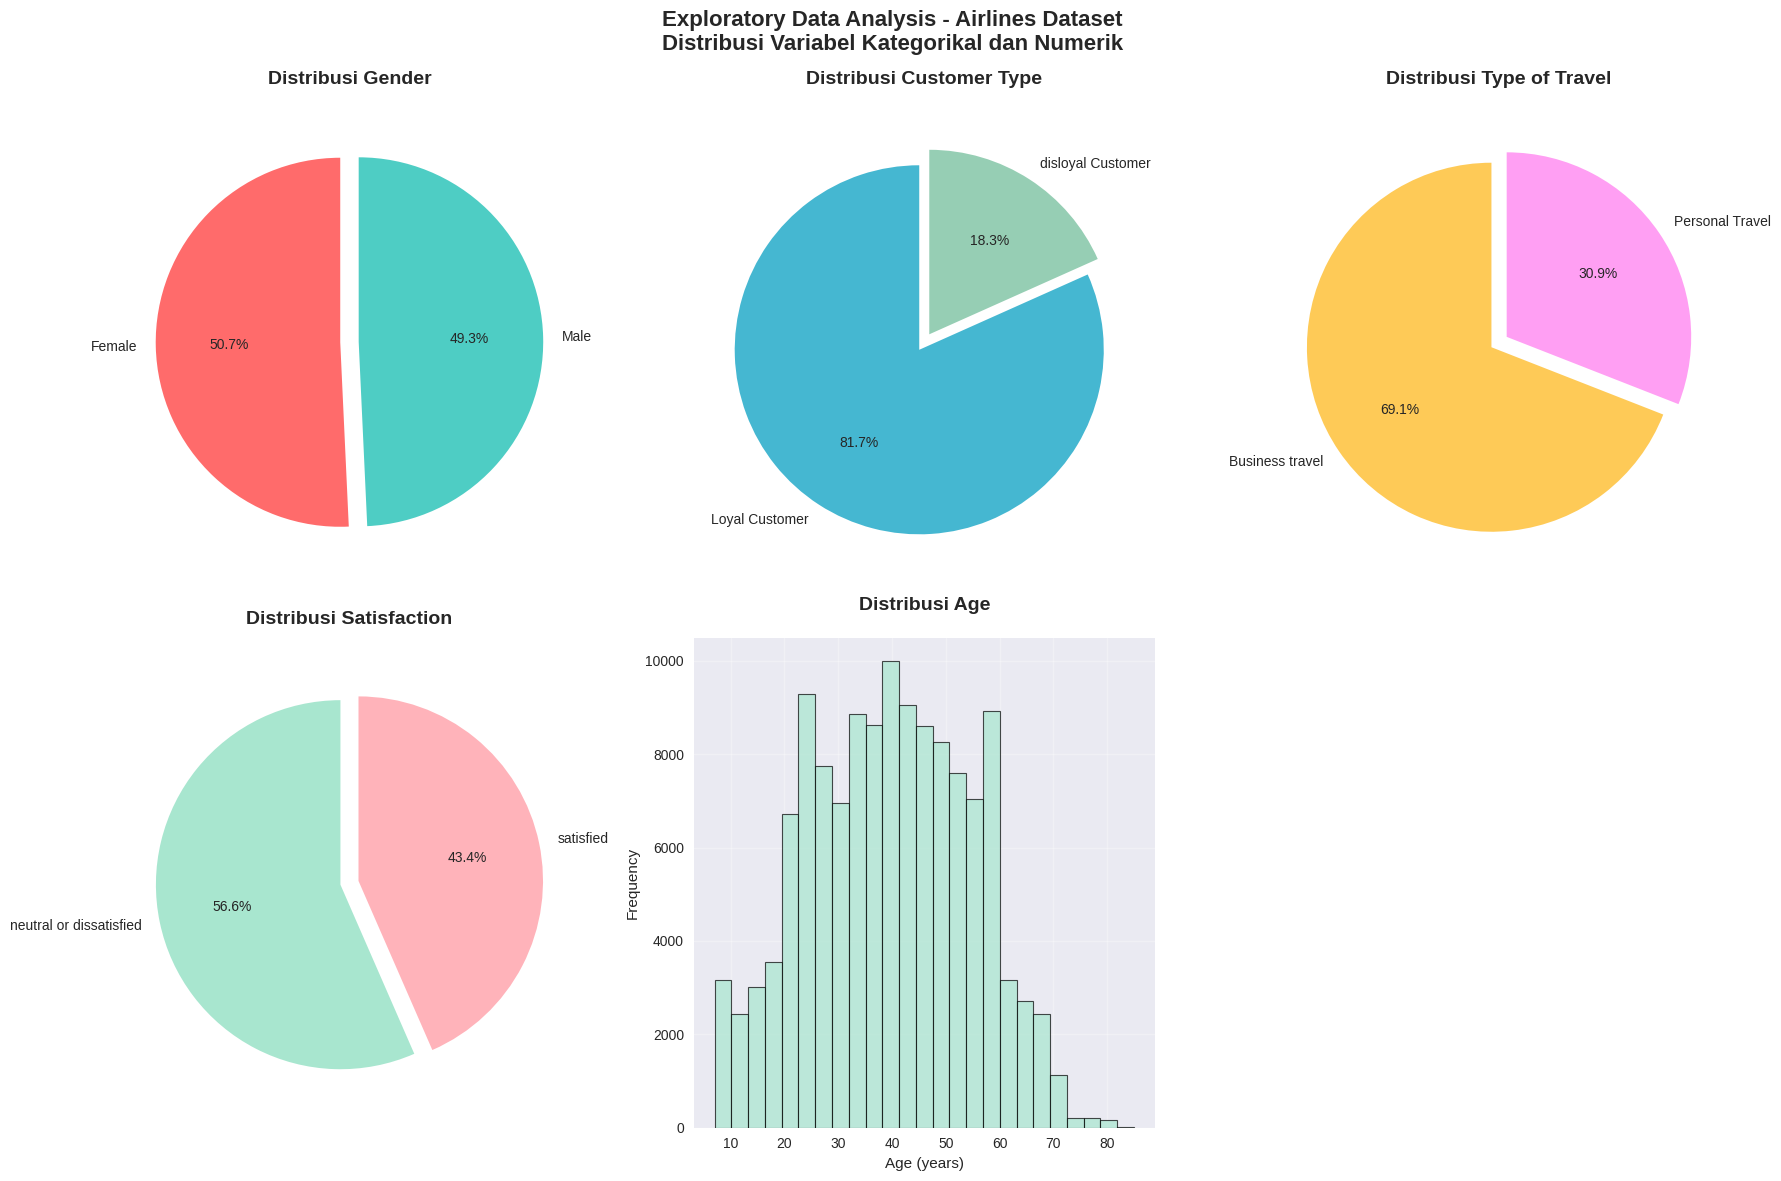

In [ ]:
# Set style untuk visualisasi yang lebih menarik
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


# Membuat figure dengan 5 subplot (2x3 grid, subplot terakhir kosong)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Exploratory Data Analysis - Airlines Dataset\nDistribusi Variabel Kategorikal dan Numerik',
             fontsize=16, fontweight='bold', y=0.98)

# 1. Gender Distribution
gender_counts = df['Gender'].value_counts()
colors1 = ['#FF6B6B', '#4ECDC4']
explode1 = [0.05] * len(gender_counts)
axes[0,0].pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%',
              startangle=90, colors=colors1, explode=explode1)
axes[0,0].set_title('Distribusi Gender', fontsize=14, fontweight='bold', pad=20)

# 2. Customer Type Distribution
customer_counts = df['Customer Type'].value_counts()
colors2 = ['#45B7D1', '#96CEB4']
explode2 = [0.05] * len(customer_counts)
axes[0,1].pie(customer_counts.values, labels=customer_counts.index, autopct='%1.1f%%',
              startangle=90, colors=colors2, explode=explode2)
axes[0,1].set_title('Distribusi Customer Type', fontsize=14, fontweight='bold', pad=20)

# 3. Type of Travel Distribution
travel_counts = df['Type of Travel'].value_counts()
colors3 = ['#FECA57', '#FF9FF3']
explode3 = [0.05] * len(travel_counts)
axes[0,2].pie(travel_counts.values, labels=travel_counts.index, autopct='%1.1f%%',
              startangle=90, colors=colors3, explode=explode3)
axes[0,2].set_title('Distribusi Type of Travel', fontsize=14, fontweight='bold', pad=20)

# 4. Satisfaction Distribution
satisfaction_counts = df['satisfaction'].value_counts()
colors4 = ['#A8E6CF', '#FFB3BA', '#DDA0DD', '#98FB98']  # Added more colors
explode4 = [0.05] * len(satisfaction_counts)
axes[1,0].pie(satisfaction_counts.values, labels=satisfaction_counts.index, autopct='%1.1f%%',
              startangle=90, colors=colors4, explode=explode4)
axes[1,0].set_title('Distribusi Satisfaction', fontsize=14, fontweight='bold', pad=20)

# 5. Age Distribution (menggunakan histogram)
axes[1,1].hist(df['Age'], bins=25, color='#A8E6CF', alpha=0.7, edgecolor='black', linewidth=0.8)
axes[1,1].set_title('Distribusi Age', fontsize=14, fontweight='bold', pad=20)
axes[1,1].set_xlabel('Age (years)')
axes[1,1].set_ylabel('Frequency')
axes[1,1].grid(True, alpha=0.3)

# Menyembunyikan subplot kosong terakhir
axes[1,2].axis('off')

# Menyesuaikan layout
plt.tight_layout()

plt.show()

## Customer Satisfaction by Gender

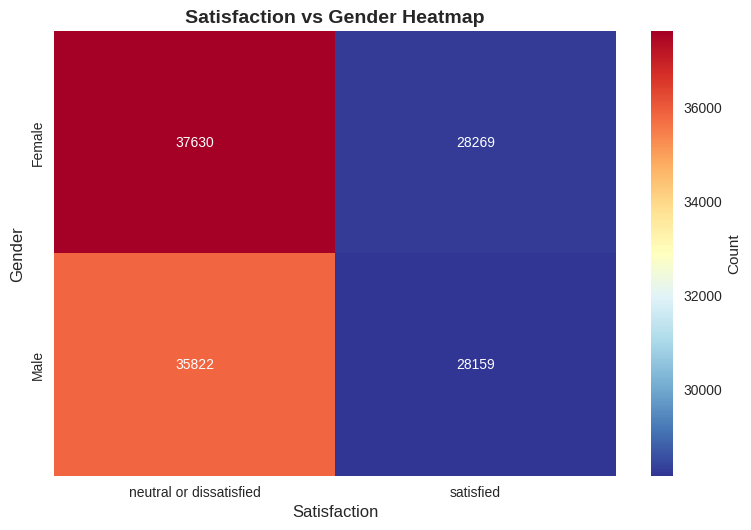

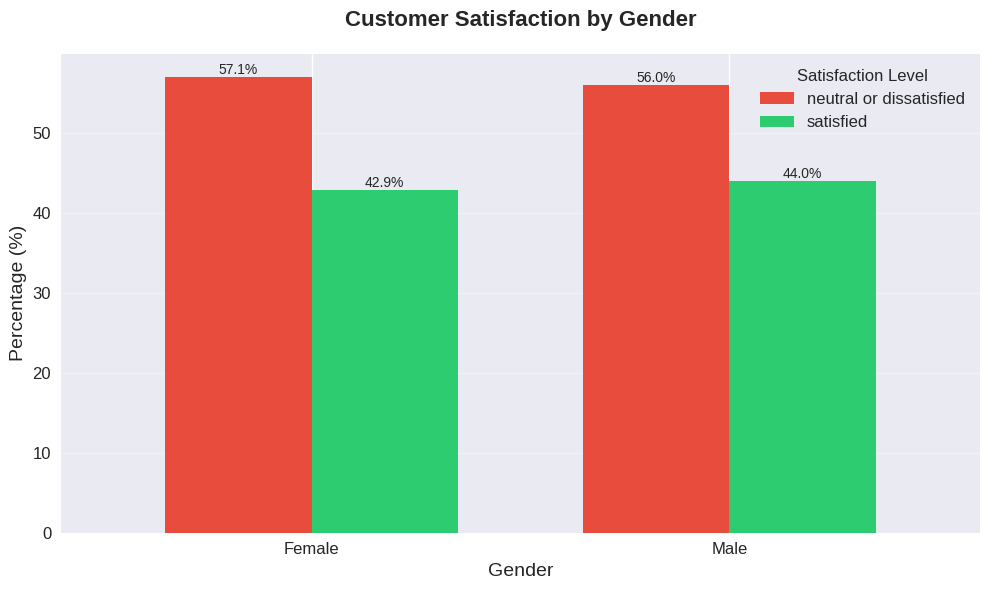

ANALISIS PROPORSI:
Female:
  - Total: 65,899
  - Satisfied: 28,269 (42.9%)
  - Dissatisfied: 37,630 (57.1%)

Male:
  - Total: 63,981
  - Satisfied: 28,159 (44.0%)
  - Dissatisfied: 35,822 (56.0%)



In [ ]:
# 1. Membuat cross-tabulation
crosstab = pd.crosstab(df['Gender'], df['satisfaction'])


# 2. Membuat cross-tabulation dengan persentase
crosstab_pct = pd.crosstab(df['Gender'], df['satisfaction'], normalize='index') * 100


# 3. Membuat visualisasi
plt.figure(figsize=(15, 10))


# Subplot 4: Heatmap
plt.subplot(2, 2, 4)
sns.heatmap(crosstab, annot=True, fmt='d', cmap='RdYlBu_r',
            cbar_kws={'label': 'Count'})
plt.title('Satisfaction vs Gender Heatmap', fontsize=14, fontweight='bold')
plt.xlabel('Satisfaction', fontsize=12)
plt.ylabel('Gender', fontsize=12)

plt.tight_layout()
plt.show()

print("")

# 5. Membuat visualisasi yang lebih fokus (single chart yang clean)
plt.figure(figsize=(10, 6))
crosstab_pct.plot(kind='bar', ax=plt.gca(),
                  color=['#e74c3c', '#2ecc71'], width=0.7)
plt.title('Customer Satisfaction by Gender', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.legend(title='Satisfaction Level', fontsize=12, title_fontsize=12)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Menambahkan nilai persentase di atas bar
ax = plt.gca()
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', fontsize=10)

plt.tight_layout()
plt.show()


# 4. Analisis tambahan - Proporsi dalam bentuk yang lebih detail
print("="*50)
print("ANALISIS PROPORSI:")
print("="*50)

for gender in crosstab.index:
    total = crosstab.loc[gender].sum()
    satisfied = crosstab.loc[gender, 'satisfied']
    dissatisfied = crosstab.loc[gender, 'dissatisfied'] if 'dissatisfied' in crosstab.columns else crosstab.loc[gender, 'neutral or dissatisfied']

    print(f"{gender}:")
    print(f"  - Total: {total:,}")
    print(f"  - Satisfied: {satisfied:,} ({satisfied/total*100:.1f}%)")
    print(f"  - Dissatisfied: {dissatisfied:,} ({dissatisfied/total*100:.1f}%)")
    print()

## Customer Satisfaction by Customer Type

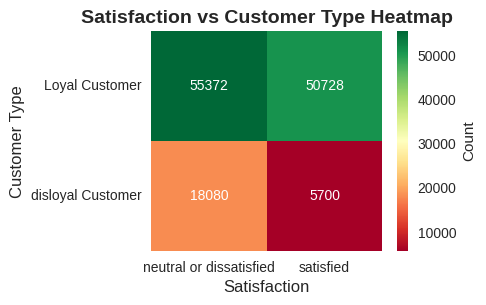

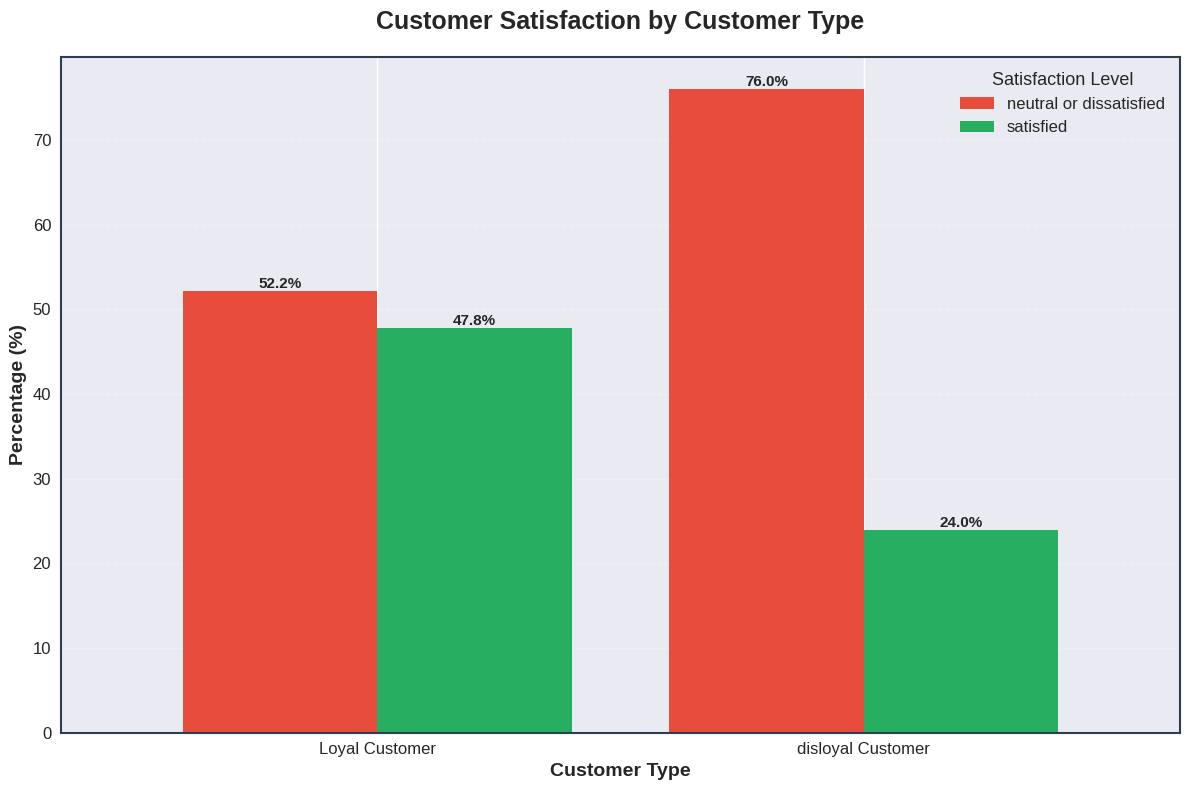

ANALISIS PROPORSI SATISFACTION BY CUSTOMER TYPE:
Loyal Customer:
  - Total customers: 106,100
  - Satisfied: 50,728 (47.8%)
  - Dissatisfied: 55,372 (52.2%)

disloyal Customer:
  - Total customers: 23,780
  - Satisfied: 5,700 (24.0%)
  - Dissatisfied: 18,080 (76.0%)



In [ ]:

# 1. Membuat cross-tabulation
crosstab = pd.crosstab(df['Customer Type'], df['satisfaction'])

# 2. Membuat cross-tabulation dengan persentase
crosstab_pct = pd.crosstab(df['Customer Type'], df['satisfaction'], normalize='index') * 100




# Subplot 4: Heatmap
plt.subplot(2, 2, 4)
sns.heatmap(crosstab, annot=True, fmt='d', cmap='RdYlGn',
            cbar_kws={'label': 'Count'})
plt.title('Satisfaction vs Customer Type Heatmap', fontsize=14, fontweight='bold')
plt.xlabel('Satisfaction', fontsize=12)
plt.ylabel('Customer Type', fontsize=12)



plt.tight_layout()
plt.show()

print("")

# 5. Visualisasi fokus yang clean
plt.figure(figsize=(12, 8))

# Main visualization
ax = plt.subplot(1, 1, 1)
crosstab_pct.plot(kind='bar', ax=ax,
                  color=['#e74c3c', '#27ae60'], width=0.8)
plt.title('Customer Satisfaction by Customer Type', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Customer Type', fontsize=14, fontweight='bold')
plt.ylabel('Percentage (%)', fontsize=14, fontweight='bold')
plt.legend(title='Satisfaction Level', fontsize=12, title_fontsize=13,
           loc='upper right', framealpha=0.9)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Menambahkan nilai persentase di atas bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', fontsize=11, fontweight='bold')

# Menambahkan border yang rapi
for spine in ax.spines.values():
    spine.set_linewidth(1.5)
    spine.set_color('#2c3e50')

plt.tight_layout()
plt.show()

# 4. Analisis detail proporsi
print("="*60)
print("ANALISIS PROPORSI SATISFACTION BY CUSTOMER TYPE:")
print("="*60)

for customer_type in crosstab.index:
    total = crosstab.loc[customer_type].sum()
    satisfied = crosstab.loc[customer_type, 'satisfied'] if 'satisfied' in crosstab.columns else 0

    # Handling different satisfaction categories
    other_cats = [col for col in crosstab.columns if col != 'satisfied']
    dissatisfied = crosstab.loc[customer_type, other_cats[0]] if other_cats else 0

    print(f"{customer_type}:")
    print(f"  - Total customers: {total:,}")
    print(f"  - Satisfied: {satisfied:,} ({satisfied/total*100:.1f}%)")
    print(f"  - Dissatisfied: {dissatisfied:,} ({dissatisfied/total*100:.1f}%)")
    print()

## Customer Satisfaction by Type of Travel

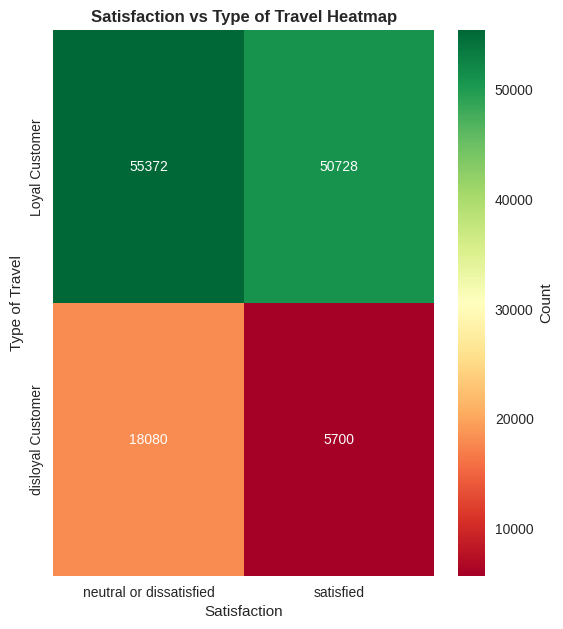

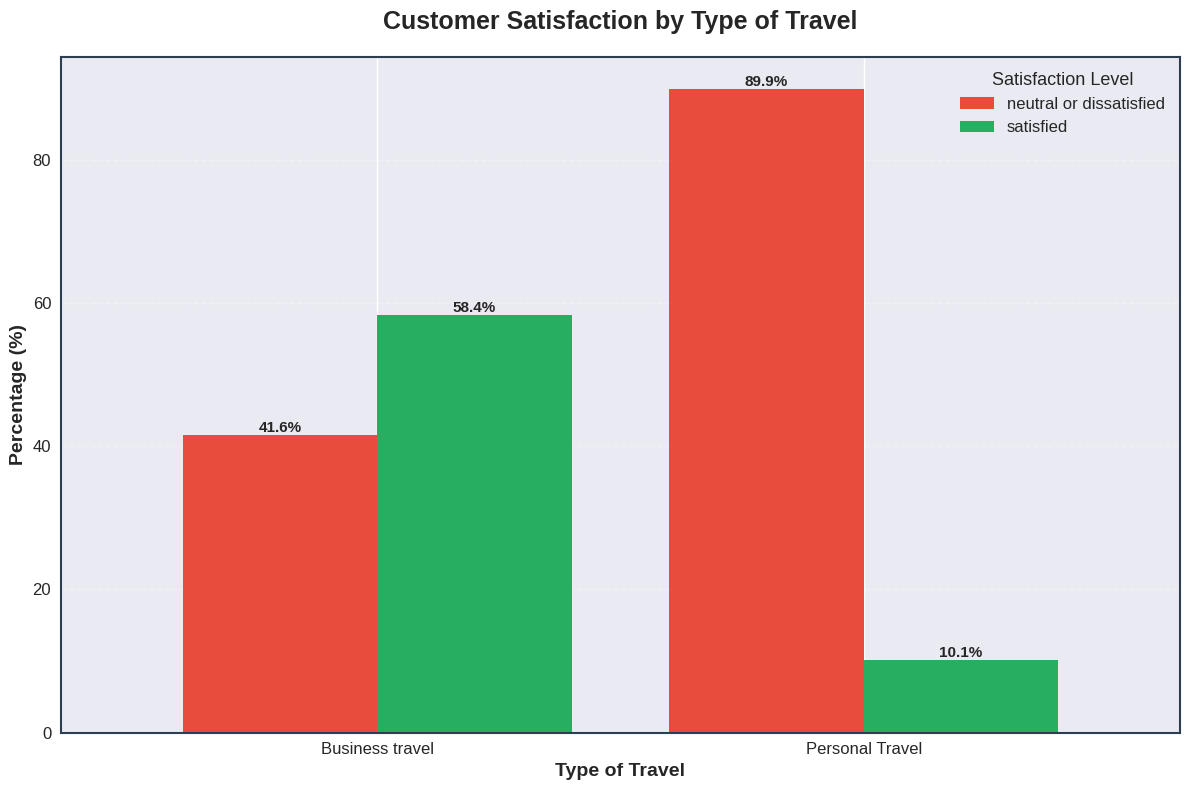

ANALISIS PROPORSI SATISFACTION BY Type of Travel:
Loyal Customer:
  - Total customers: 106,100
  - Satisfied: 50,728 (47.8%)
  - Dissatisfied: 55,372 (52.2%)

disloyal Customer:
  - Total customers: 23,780
  - Satisfied: 5,700 (24.0%)
  - Dissatisfied: 18,080 (76.0%)



In [ ]:


# 2. Membuat cross-tabulation dengan persentase
crosstab_pct = pd.crosstab(df['Type of Travel'], df['satisfaction'], normalize='index') * 100


# 3. Membuat visualisasi lengkap
plt.figure(figsize=(16, 12))


# Subplot 4: Heatmap
plt.subplot(2, 3, 4)
sns.heatmap(crosstab, annot=True, fmt='d', cmap='RdYlGn',
            cbar_kws={'label': 'Count'})
plt.title('Satisfaction vs Type of Travel Heatmap', fontsize=12, fontweight='bold')
plt.xlabel('Satisfaction', fontsize=11)
plt.ylabel('Type of Travel', fontsize=11)

plt.tight_layout()
plt.show()

print("")

# 5. Visualisasi fokus yang clean
plt.figure(figsize=(12, 8))

# Main visualization
ax = plt.subplot(1, 1, 1)
crosstab_pct.plot(kind='bar', ax=ax,
                  color=['#e74c3c', '#27ae60'], width=0.8)
plt.title('Customer Satisfaction by Type of Travel', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Type of Travel', fontsize=14, fontweight='bold')
plt.ylabel('Percentage (%)', fontsize=14, fontweight='bold')
plt.legend(title='Satisfaction Level', fontsize=12, title_fontsize=13,
           loc='upper right', framealpha=0.9)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Menambahkan nilai persentase di atas bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', fontsize=11, fontweight='bold')

# Menambahkan border yang rapi
for spine in ax.spines.values():
    spine.set_linewidth(1.5)
    spine.set_color('#2c3e50')

plt.tight_layout()
plt.show()

# 4. Analisis detail proporsi
print("="*60)
print("ANALISIS PROPORSI SATISFACTION BY Type of Travel:")
print("="*60)

for customer_type in crosstab.index:
    total = crosstab.loc[customer_type].sum()
    satisfied = crosstab.loc[customer_type, 'satisfied'] if 'satisfied' in crosstab.columns else 0

    # Handling different satisfaction categories
    other_cats = [col for col in crosstab.columns if col != 'satisfied']
    dissatisfied = crosstab.loc[customer_type, other_cats[0]] if other_cats else 0

    print(f"{customer_type}:")
    print(f"  - Total customers: {total:,}")
    print(f"  - Satisfied: {satisfied:,} ({satisfied/total*100:.1f}%)")
    print(f"  - Dissatisfied: {dissatisfied:,} ({dissatisfied/total*100:.1f}%)")
    print()


## Customer Satisfaction by Age

AGE STATISTICS:
Range: 7 - 85 years
Mean: 39.4 years
Median: 40.0 years
Standard Deviation: 15.1 years



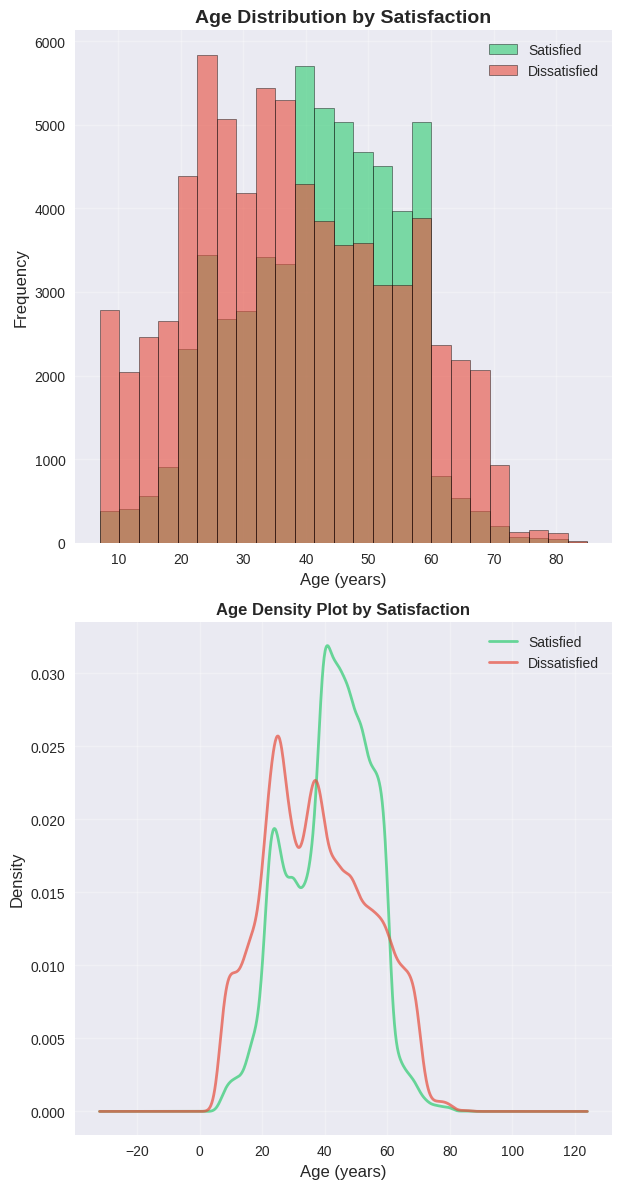

AGE STATISTICS BY SATISFACTION:
NEUTRAL OR DISSATISFIED:
  - Count: 73,452
  - Mean Age: 37.7 years
  - Median Age: 37.0 years
  - Age Range: 7 - 85 years
  - Std Dev: 16.5 years

SATISFIED:
  - Count: 56,428
  - Mean Age: 41.7 years
  - Median Age: 43.0 years
  - Age Range: 7 - 85 years
  - Std Dev: 12.8 years

STATISTICAL TEST RESULTS:
T-statistic: 48.7650
P-value: 0.0000
Mean difference: 4.09 years
✓ Ada perbedaan signifikan rata-rata usia antara satisfied dan dissatisfied customers


In [ ]:

# 1. Basic statistics untuk Age
print("="*50)
print("AGE STATISTICS:")
print("="*50)
print(f"Range: {df['Age'].min()} - {df['Age'].max()} years")
print(f"Mean: {df['Age'].mean():.1f} years")
print(f"Median: {df['Age'].median():.1f} years")
print(f"Standard Deviation: {df['Age'].std():.1f} years")
print()

# 2. Membuat visualisasi lengkap
plt.figure(figsize=(18, 12))

# Subplot 2: Age Distribution by Satisfaction (Overlapping Histograms)
plt.subplot(2, 3, 2)
satisfied = df[df['satisfaction'] == 'satisfied']['Age']
dissatisfied = df[df['satisfaction'] != 'satisfied']['Age']

plt.hist(satisfied, bins=25, alpha=0.6, label='Satisfied', color='#2ecc71', edgecolor='black', linewidth=0.5)
plt.hist(dissatisfied, bins=25, alpha=0.6, label='Dissatisfied', color='#e74c3c', edgecolor='black', linewidth=0.5)
plt.title('Age Distribution by Satisfaction', fontsize=14, fontweight='bold')
plt.xlabel('Age (years)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)


# Subplot 5: Density Plot
plt.subplot(2, 3, 5)
satisfied.plot.density(alpha=0.7, label='Satisfied', color='#2ecc71', linewidth=2)
dissatisfied.plot.density(alpha=0.7, label='Dissatisfied', color='#e74c3c', linewidth=2)
plt.title('Age Density Plot by Satisfaction', fontsize=12, fontweight='bold')
plt.xlabel('Age (years)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)


plt.tight_layout()
plt.show()

# 4. Analisis statistik detail
print("="*60)
print("AGE STATISTICS BY SATISFACTION:")
print("="*60)

for satisfaction_level in df['satisfaction'].unique():
    subset = df[df['satisfaction'] == satisfaction_level]
    print(f"{satisfaction_level.upper()}:")
    print(f"  - Count: {len(subset):,}")
    print(f"  - Mean Age: {subset['Age'].mean():.1f} years")
    print(f"  - Median Age: {subset['Age'].median():.1f} years")
    print(f"  - Age Range: {subset['Age'].min()} - {subset['Age'].max()} years")
    print(f"  - Std Dev: {subset['Age'].std():.1f} years")
    print()

# 5. T-test untuk perbedaan rata-rata usia
from scipy import stats

t_stat, p_value = stats.ttest_ind(satisfied, dissatisfied)
print("="*60)
print("STATISTICAL TEST RESULTS:")
print("="*60)
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Mean difference: {satisfied.mean() - dissatisfied.mean():.2f} years")

if p_value < 0.05:
    print("✓ Ada perbedaan signifikan rata-rata usia antara satisfied dan dissatisfied customers")
else:
    print("✗ Tidak ada perbedaan signifikan rata-rata usia antara satisfied dan dissatisfied customers")



# Preprocesing

In [ ]:
# Reset matplotlib configuration
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Set up matplotlib backend
# %matplotlib inline

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
df = pd.read_csv('dataset_airline.csv')

df.head(5)

Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  2  ...                       1   
2                                  2  ...                       5   
3                                  5  ...                       2   
4                                  3  ...                       3   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   
3                 4            2                          11   
4                 3            3                           0   

   Arrival Delay in Minutes             satisfaction  
0                      18.0  neutral or dissatisfied  
1                       6.0  neutral or dissatisfied  
2                       0.0                satisfied  
3                       9.0  neutral or dissatisfied  
4                       0.0                satisfied  

[5 rows x 25 columns]

In [ ]:
df['satisfaction'].value_counts()

satisfaction
neutral or dissatisfied    73452
satisfied                  56428
Name: count, dtype: int64


Distribusi Cluster:
satisfaction
neutral or dissatisfied    73452
satisfied                  56428
Name: count, dtype: int64


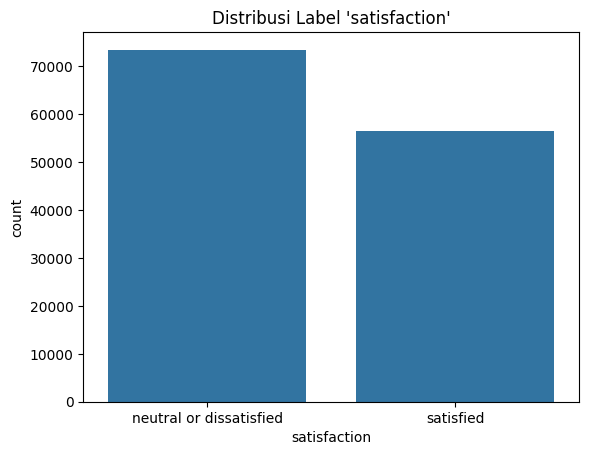

In [ ]:
print("\nDistribusi Cluster:")
cluster_counts = df['satisfaction'].value_counts().sort_index()
print(cluster_counts)

pl = sns.countplot(x=df["satisfaction"])
pl.set_title("Distribusi Label 'satisfaction'")
plt.show()

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      1298

In [ ]:
# Drop kolom yang tidak berguna, seperti Unnamed: - dan id
df = df.drop(['Unnamed: 0', 'id'], axis=1)

In [ ]:
df.describe()

Age  Flight Distance  Inflight wifi service  \
count  129880.000000    129880.000000          129880.000000   
mean       39.427957      1190.316392               2.728696   
std        15.119360       997.452477               1.329340   
min         7.000000        31.000000               0.000000   
25%        27.000000       414.000000               2.000000   
50%        40.000000       844.000000               3.000000   
75%        51.000000      1744.000000               4.000000   
max        85.000000      4983.000000               5.000000   

       Departure/Arrival time convenient  Ease of Online booking  \
count                      129880.000000           129880.000000   
mean                            3.057599                2.756876   
std                             1.526741                1.401740   
min                             0.000000                0.000000   
25%                             2.000000                2.000000   
50%                             3.000000                3.000000   
75%                             4.000000                4.000000   
max                             5.000000                5.000000   

       Gate location  Food and drink  Online boarding   Seat comfort  \
count  129880.000000   129880.000000    129880.000000  129880.000000   
mean        2.976925        3.204774         3.252633       3.441361   
std         1.278520        1.329933         1.350719       1.319289   
min         0.000000        0.000000         0.000000       0.000000   
25%         2.000000        2.000000         2.000000       2.000000   
50%         3.000000        3.000000         3.000000       4.000000   
75%         4.000000        4.000000         4.000000       5.000000   
max         5.000000        5.000000         5.000000       5.000000   

       Inflight entertainment  On-board service  Leg room service  \
count           129880.000000     129880.000000     129880.000000   
mean                 3.358077          3.383023          3.350878   
std                  1.334049          1.287099          1.316252   
min                  0.000000          0.000000          0.000000   
25%                  2.000000          2.000000          2.000000   
50%                  4.000000          4.000000          4.000000   
75%                  4.000000          4.000000          4.000000   
max                  5.000000          5.000000          5.000000   

       Baggage handling  Checkin service  Inflight service    Cleanliness  \
count     129880.000000    129880.000000     129880.000000  129880.000000   
mean           3.632114         3.306267          3.642193       3.286326   
std            1.180025         1.266185          1.176669       1.313682   
min            1.000000         0.000000          0.000000       0.000000   
25%            3.000000         3.000000          3.000000       2.000000   
50%            4.000000         3.000000          4.000000       3.000000   
75%            5.000000         4.000000          5.000000       4.000000   
max            5.000000         5.000000          5.000000       5.000000   

       Departure Delay in Minutes  Arrival Delay in Minutes  
count               129880.000000             129487.000000  
mean                    14.713713                 15.091129  
std                     38.071126                 38.465650  
min                      0.000000                  0.000000  
25%                      0.000000                  0.000000  
50%                      0.000000                  0.000000  
75%                     12.000000                 13.000000  
max                   1592.000000               1584.000000

### Missing Value Handling

In [ ]:
# ini untuk cek jumlah missing value per kolom
missing = df.isnull().sum()
print("Missing value per kolom:\n", missing[missing > 0])

Missing value per kolom:
 Arrival Delay in Minutes    393
dtype: int64


In [ ]:
# aku buat pisah kolom numerik dan kategorikal
numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print(numerical_cols)
print(categorical_cols)

Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')
Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], dtype='object')


In [ ]:
missing = df.isnull().sum()
missing_percentage = (missing / len(df)) * 100

# Filter columns with missing values
missing_data = pd.DataFrame({
    'Count': missing,
    'Percentage': missing_percentage
}).sort_values(by='Percentage', ascending=False)

missing_data = missing_data[missing_data['Count'] > 0]

print("\nMissing value details:")
missing_data


Missing value details:


Count  Percentage
Arrival Delay in Minutes    393    0.302587

In [ ]:
df_prepro = df.copy()

In [ ]:
# kolom numerik aku imputasi pake mean
df_prepro[numerical_cols] = df_prepro[numerical_cols].fillna(df_prepro[numerical_cols].mean())

df_prepro.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

### Check Outliers

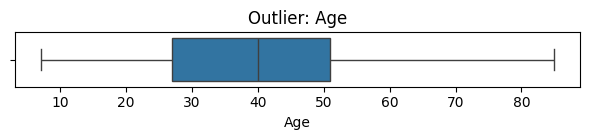

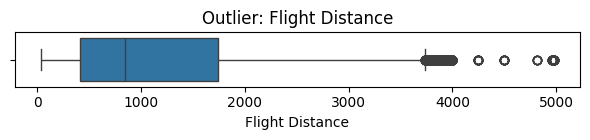

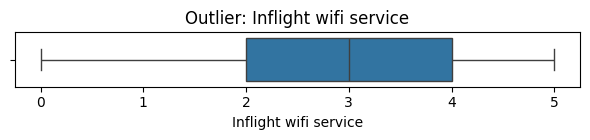

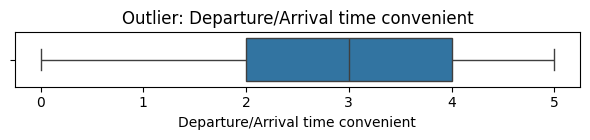

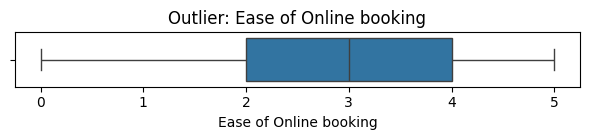

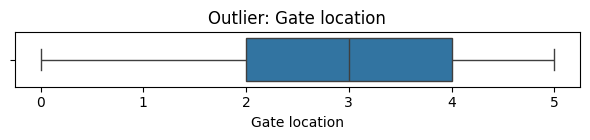

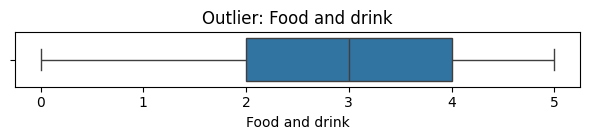

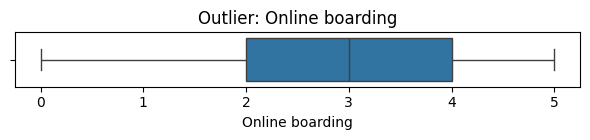

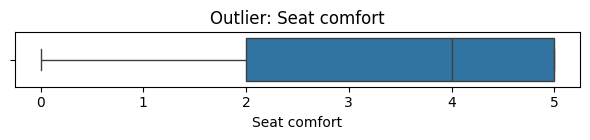

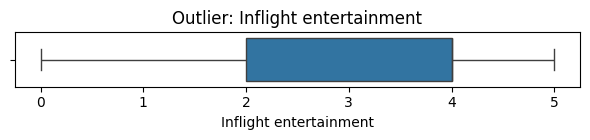

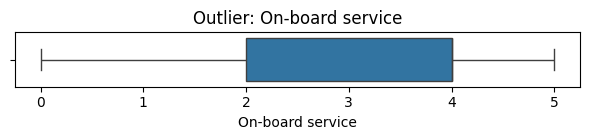

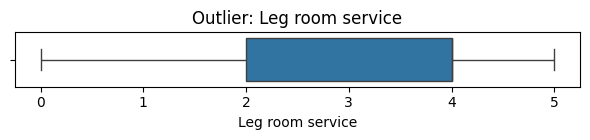

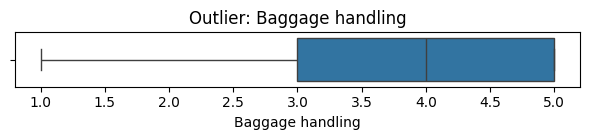

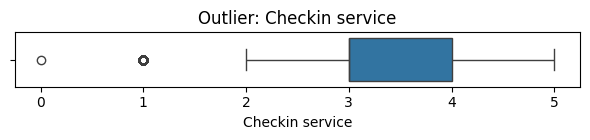

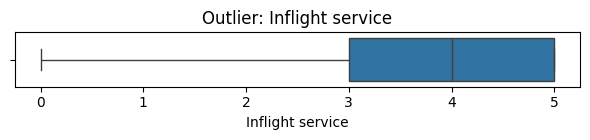

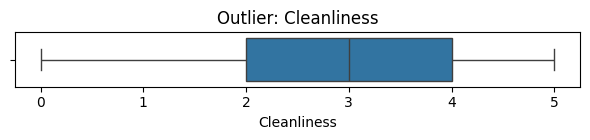

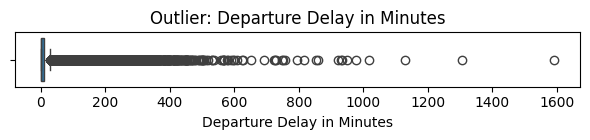

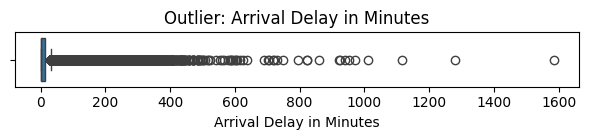

In [ ]:
# 5. Analisis Outlier
for col in numerical_cols:
    if df_prepro[col].nunique() > 1 and df_prepro[col].notnull().sum() > 0:
        plt.figure(figsize=(6, 1.5))
        sns.boxplot(x=df_prepro[col])
        plt.title(f'Outlier: {col}')
        plt.tight_layout()
        plt.show()
    else:
        print(f"Skipping {col}: tidak cukup variasi data untuk diplot.")

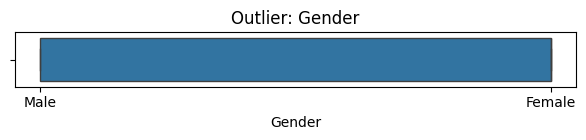

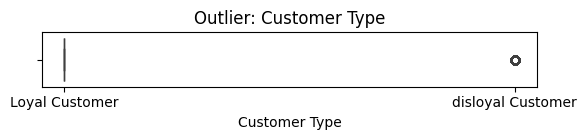

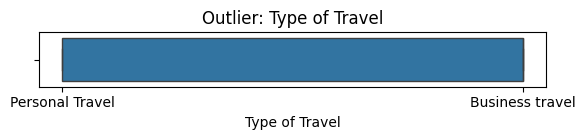

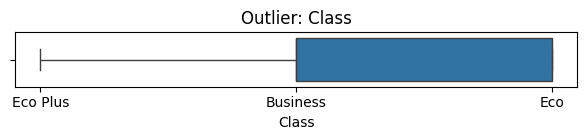

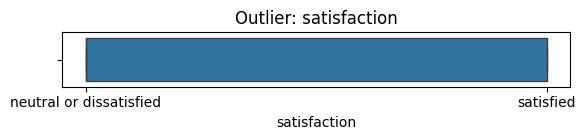

In [ ]:
# 5. Analisis Outlier
for col in categorical_cols:
    if df_prepro[col].nunique() > 1 and df_prepro[col].notnull().sum() > 0:
        plt.figure(figsize=(6, 1.5))
        sns.boxplot(x=df_prepro[col])
        plt.title(f'Outlier: {col}')
        plt.tight_layout()
        plt.show()
    else:
        print(f"Skipping {col}: tidak cukup variasi data untuk diplot.")

### Encode Data Kategorikal

In [ ]:
for i in categorical_cols:
  print(i, df_prepro[i].unique())

Gender ['Male' 'Female']
Customer Type ['Loyal Customer' 'disloyal Customer']
Type of Travel ['Personal Travel' 'Business travel']
Class ['Eco Plus' 'Business' 'Eco']
satisfaction ['neutral or dissatisfied' 'satisfied']


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in categorical_cols:
  df_prepro[i] = le.fit_transform(df_prepro[i])
  print(i, df_prepro[i].unique())
  print(le.classes_)
  print()

Gender [1 0]
['Female' 'Male']

Customer Type [0 1]
['Loyal Customer' 'disloyal Customer']

Type of Travel [1 0]
['Business travel' 'Personal Travel']

Class [2 0 1]
['Business' 'Eco' 'Eco Plus']

satisfaction [0 1]
['neutral or dissatisfied' 'satisfied']



In [ ]:
from sklearn.preprocessing import StandardScaler

# Modelling

In [ ]:
X = df_prepro.drop(['satisfaction'], axis=1)  # drop satisfaction di X agar target terpisah
y = df_prepro['satisfaction']  # target klasifikasi provinsi

In [ ]:
# Normalisasi Min-Max
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X

0         1         2         3         4         5         6   \
0       1.014878 -0.473422 -1.747961  1.493951  2.262940 -0.732184  0.204090   
1       1.014878  2.112281 -0.954274 -0.669366 -0.955724 -0.957760  0.204090   
2      -0.985340 -0.473422 -0.888133 -0.669366 -0.955724 -0.048440 -0.548166   
3      -0.985340 -0.473422 -0.954274 -0.669366 -0.955724 -0.629924 -0.548166   
4       1.014878 -0.473422  1.426788 -0.669366 -0.955724 -0.978814  0.204090   
...          ...       ...       ...       ...       ...       ...       ...   
129875  1.014878  2.112281 -0.359008 -0.669366 -0.955724 -0.666016  0.204090   
129876  1.014878 -0.473422 -1.086555 -0.669366 -0.955724 -0.545709  0.956346   
129877 -0.985340 -0.473422 -1.483399  1.493951  0.653608 -0.363243 -0.548166   
129878  1.014878 -0.473422 -1.681821 -0.669366 -0.955724 -0.063478  0.204090   
129879 -0.985340 -0.473422  0.170117  1.493951  0.653608 -0.928686 -0.548166   

              7         8         9   ...        12        13        14  \
0       0.617265  0.173445 -1.546267  ...  1.181428  1.230787  0.479357   
1      -0.692719  0.173445  0.018048  ... -1.850520 -1.767616 -1.851475   
2      -0.692719 -0.539957 -0.764109  ...  1.181428  1.230787  0.479357   
3       1.272257  1.600249  1.582364  ... -1.092533 -1.018015 -1.074531   
4      -0.037727  0.173445  0.018048  ...  1.181428 -0.268414 -0.297587   
...          ...       ...       ...  ...       ...       ...       ...   
129875 -0.037727  0.173445 -1.546267  ...  0.423441  0.481186 -0.297587   
129876  0.617265  0.886847  0.800206  ...  0.423441  0.481186  0.479357   
129877  1.272257 -1.253359  1.582364  ... -1.092533 -1.018015  0.479357   
129878 -0.037727  0.173445  0.018048  ...  0.423441  0.481186 -0.297587   
129879  1.272257 -0.539957  1.582364  ... -1.092533 -1.767616 -1.851475   

              15        16        17        18        19        20        21  
0      -0.266574  0.311762  0.547894  1.153946  1.304487  0.270187  0.075738  
1       1.252898 -0.535681 -1.821437  0.304086 -1.740402 -0.360214 -0.236703  
2      -0.266574  0.311762  0.547894  0.304086  1.304487 -0.386481 -0.392924  
3       1.252898 -0.535681 -1.821437  0.304086 -0.979180 -0.097547 -0.158593  
4       0.493162  0.311762 -0.241883 -0.545774 -0.217958 -0.386481 -0.392924  
...          ...       ...       ...       ...       ...       ...       ...  
129875 -1.026310  0.311762  0.547894  1.153946  0.543264 -0.386481 -0.392924  
129876  1.252898  1.159206  1.337671  1.153946  0.543264 -0.386481 -0.392924  
129877 -0.266574  0.311762  1.337671  0.304086 -0.979180 -0.386481 -0.392924  
129878 -1.026310  1.159206  0.547894  1.153946  0.543264 -0.386481 -0.392924  
129879 -1.026310 -2.230567 -1.821437 -2.245494 -1.740402 -0.386481 -0.392924  

[129880 rows x 22 columns]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Supervised

#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     14622
           1       0.98      0.94      0.96     11354

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976

Accuracy: 0.9621958731136434


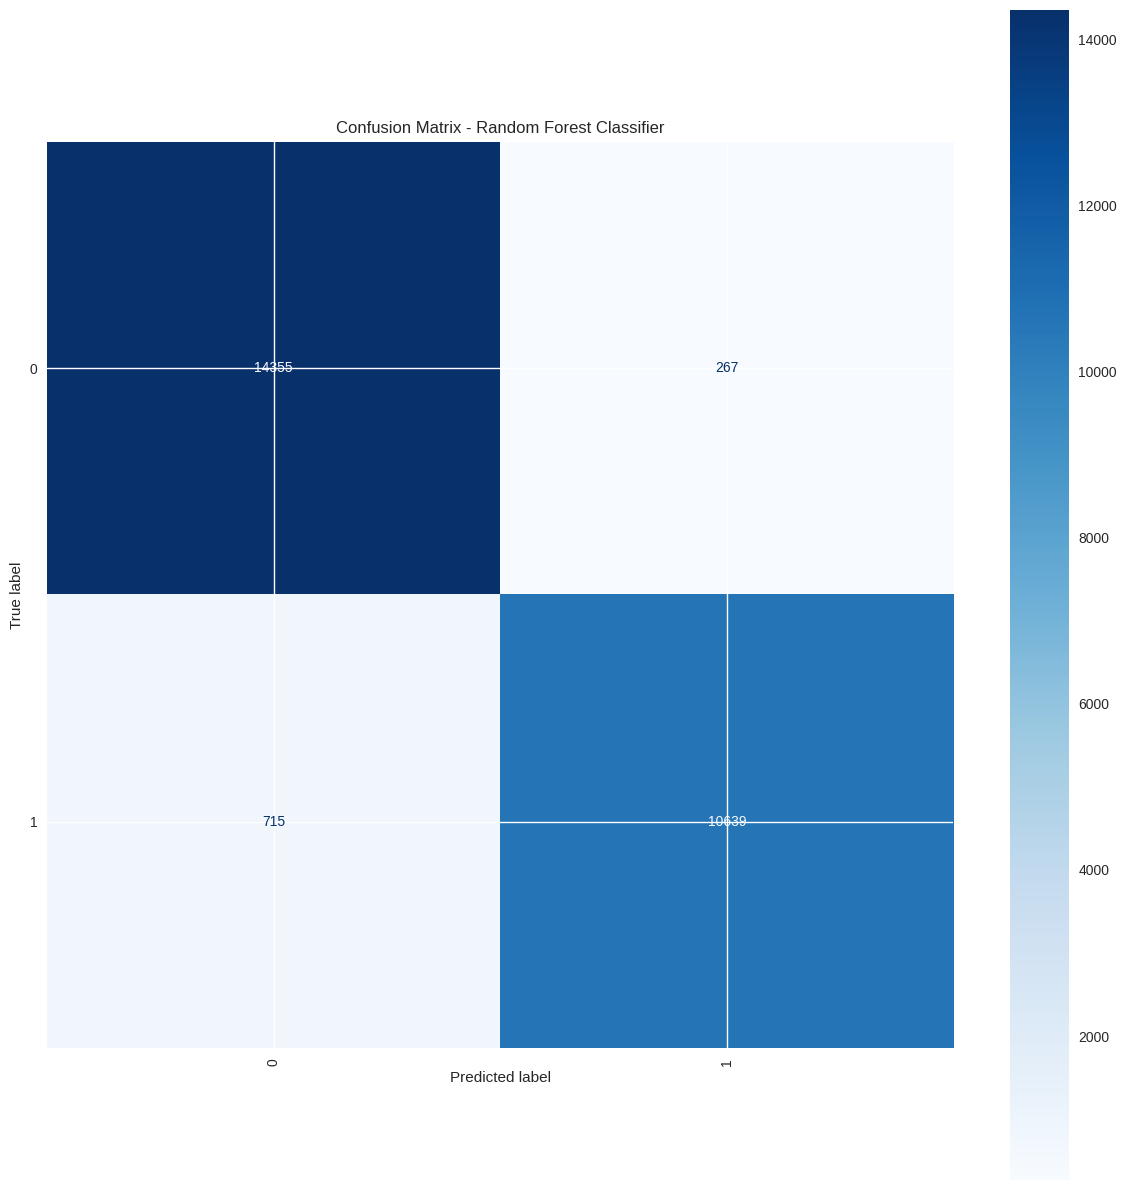

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

labels = np.unique(y)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

fig, ax = plt.subplots(figsize=(12, 12))
disp.plot(ax=ax, cmap='Blues', xticks_rotation=90)
plt.title("Confusion Matrix - Random Forest Classifier")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Buat model
model = RandomForestClassifier(random_state=42)

# Stratified K-Fold (misalnya 5 fold)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluasi akurasi per fold
scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')
print("Accuracy per fold:", scores)
print("Mean Accuracy:", np.mean(scores))


Accuracy per fold: [0.96269634 0.96404373 0.96338928 0.96204188 0.96177241]
Mean Accuracy: 0.9627887280566677


#### XGBOOST

In [ ]:
from xgboost import XGBClassifier

# Split data (pastikan y sudah berupa label numerik seperti Island_encoded)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Inisialisasi model
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

# Training
xgb_model.fit(X_train, y_train)

# Prediksi
y_pred = xgb_model.predict(X_test)

# Evaluasi
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     14690
           1       0.97      0.94      0.95     11286

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976

Accuracy: 0.9611564521096396


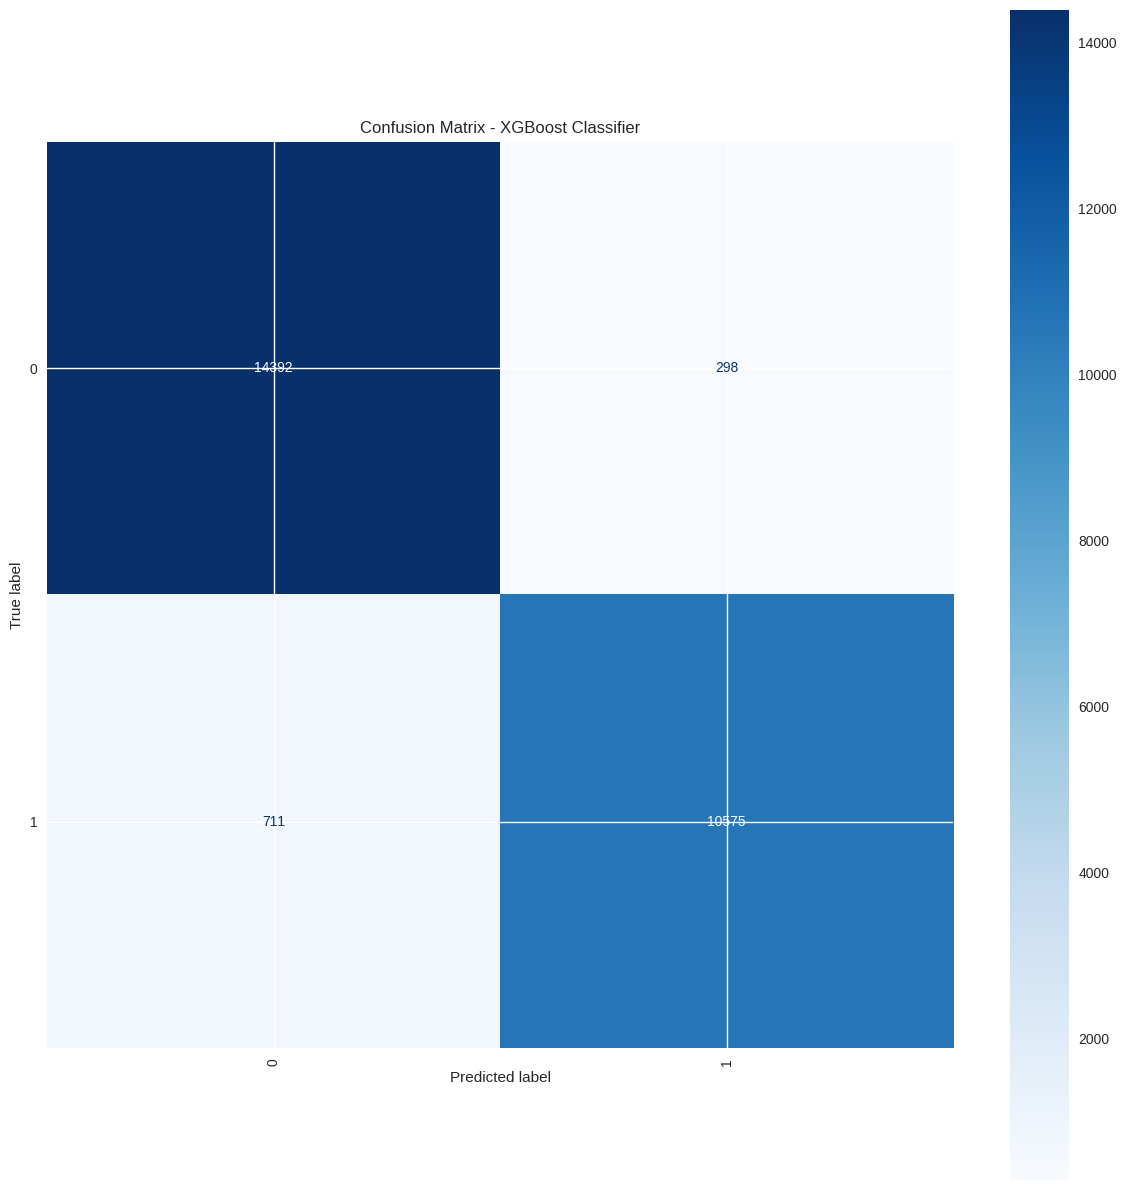

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

labels = np.unique(y)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

fig, ax = plt.subplots(figsize=(12, 12))
disp.plot(ax=ax, cmap='Blues', xticks_rotation=90)
plt.title("Confusion Matrix - XGBoost Classifier")
plt.tight_layout()
plt.show()

## Unsupervised

In [ ]:
df_prepro['satisfaction'].unique()

array([0, 1])

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(X)

df_pca = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])

In [ ]:
df_pca.head()

PC1       PC2
0  1.269295 -0.819560
1 -3.073974  0.796907
2  2.383938 -1.874878
3 -1.530340  2.313332
4  1.098938  0.236271

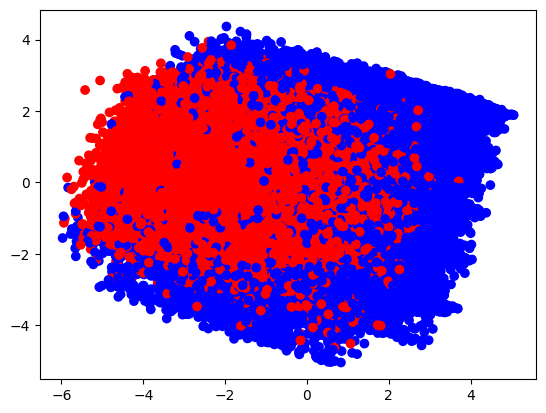

In [ ]:
import matplotlib.pyplot as plt
warna={'neutral or dissatisfied': 'red', 'satisfied': 'blue'}
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df['satisfaction'].map(warna))
plt.show()

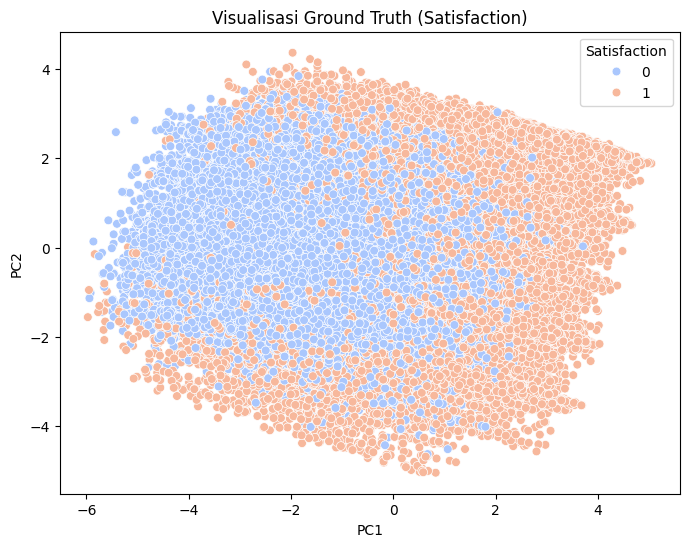

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df_pca['PC1'],
    y=df_pca['PC2'],
    hue=y,
    palette='coolwarm',
    s=40
)
plt.title('Visualisasi Ground Truth (Satisfaction)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Satisfaction')
plt.show()

#### K-Means

Shape data untuk clustering: (129880, 22)
Fitur yang digunakan: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
=== ANALISIS JUMLAH CLUSTER OPTIMAL ===


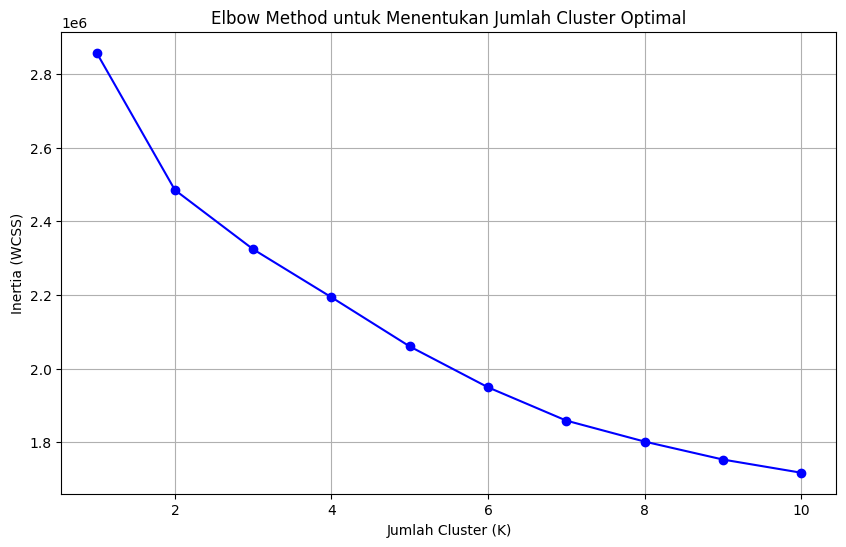


Metrik Evaluasi Clustering:
    K  Silhouette Score  Calinski-Harabasz Index  Davies-Bouldin Index  \
0   2          0.128348             19480.349452              2.502397   
1   3          0.113671             14910.643028              2.634531   
2   4          0.097846             13102.386751              2.520126   
3   5          0.101383             12566.917827              2.246742   
4   6          0.108556             12103.698173              2.104457   
5   7          0.118115             11628.924798              1.974636   
6   8          0.120012             10869.095171              2.062941   
7   9          0.117171             10225.644811              2.140111   
8  10          0.116172              9579.622443              2.120271   

        Inertia  
0  2.484685e+06  
1  2.323792e+06  
2  2.193497e+06  
3  2.060033e+06  
4  1.949116e+06  
5  1.858755e+06  
6  1.801801e+06  
7  1.753095e+06  
8  1.717299e+06  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA
import warnings
from sklearn.utils import check_random_state
warnings.filterwarnings('ignore')

# Menggunakan data yang sudah di-preprocess dan scaled
# X sudah berisi fitur yang sudah dinormalisasi (tanpa kolom Province)
print("Shape data untuk clustering:", X.shape)
print("Fitur yang digunakan:", X.columns.tolist())

# Menentukan jumlah cluster optimal menggunakan Elbow Method
def plot_elbow_method(X, max_k=10):
    inertias = []
    K_range = range(1, max_k + 1)

    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X)
        inertias.append(kmeans.inertia_)

    plt.figure(figsize=(10, 6))
    plt.plot(K_range, inertias, 'bo-')
    plt.title('Elbow Method untuk Menentukan Jumlah Cluster Optimal')
    plt.xlabel('Jumlah Cluster (K)')
    plt.ylabel('Inertia (WCSS)')
    plt.grid(True)
    plt.show()

    return inertias

def evaluate_clustering_metrics(X, max_k=10, sample_size=10000):
    metrics_df = []
    K_range = range(2, max_k + 1)
    X_np = X.values if hasattr(X, "values") else X  # agar support DataFrame/array

    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(X_np)

        # Silhouette pakai sample
        if len(X_np) > sample_size:
            rs = check_random_state(42)
            idx = rs.choice(len(X_np), sample_size, replace=False)
            silhouette = silhouette_score(X_np, cluster_labels, sample_size=sample_size, random_state=42)
        else:
            silhouette = silhouette_score(X_np, cluster_labels)

        calinski = calinski_harabasz_score(X_np, cluster_labels)
        davies_bouldin = davies_bouldin_score(X_np, cluster_labels)

        metrics_df.append({
            'K': k,
            'Silhouette Score': silhouette,
            'Calinski-Harabasz Index': calinski,
            'Davies-Bouldin Index': davies_bouldin,
            'Inertia': kmeans.inertia_
        })

    metrics_df = pd.DataFrame(metrics_df)
    return metrics_df

# Jalankan analisis untuk menentukan K optimal
print("=== ANALISIS JUMLAH CLUSTER OPTIMAL ===")
inertias = plot_elbow_method(X, max_k=10)
metrics_df = evaluate_clustering_metrics(X, max_k=10)

print("\nMetrik Evaluasi Clustering:")
print(metrics_df)

In [ ]:
df_clustered = df_prepro.copy()

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X)
df_clustered['cluster'] = clusters

In [ ]:
df_clustered

Gender  Customer Type  Age  Type of Travel  Class  Flight Distance  \
0            1              0   13               1      2              460   
1            1              1   25               0      0              235   
2            0              0   26               0      0             1142   
3            0              0   25               0      0              562   
4            1              0   61               0      0              214   
...        ...            ...  ...             ...    ...              ...   
129875       1              1   34               0      0              526   
129876       1              0   23               0      0              646   
129877       0              0   17               1      1              828   
129878       1              0   14               0      0             1127   
129879       0              0   42               1      1              264   

        Inflight wifi service  Departure/Arrival time convenient  \
0                           3                                  4   
1                           3                                  2   
2                           2                                  2   
3                           2                                  5   
4                           3                                  3   
...                       ...                                ...   
129875                      3                                  3   
129876                      4                                  4   
129877                      2                                  5   
129878                      3                                  3   
129879                      2                                  5   

        Ease of Online booking  Gate location  ...  On-board service  \
0                            3              1  ...                 4   
1                            3              3  ...                 1   
2                            2              2  ...                 4   
3                            5              5  ...                 2   
4                            3              3  ...                 3   
...                        ...            ...  ...               ...   
129875                       3              1  ...                 3   
129876                       4              4  ...                 4   
129877                       1              5  ...                 4   
129878                       3              3  ...                 3   
129879                       2              5  ...                 1   

        Leg room service  Baggage handling  Checkin service  Inflight service  \
0                      3                 4                4                 5   
1                      5                 3                1                 4   
2                      3                 4                4                 4   
3                      5                 3                1                 4   
4                      4                 4                3                 3   
...                  ...               ...              ...               ...   
129875                 2                 4                4                 5   
129876                 5                 5                5                 5   
129877                 3                 4                5                 4   
129878                 2                 5                4                 5   
129879                 2                 1                1                 1   

        Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes  \
0                 5                          25                      18.0   
1                 1                           1                       6.0   
2                 5                           0                       0.0   
3                 2                          11                       9.0   
4                 3            

In [ ]:
df_pca.columns

Index(['PC1', 'PC2'], dtype='object')

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, adjusted_rand_score
import numpy as np
from sklearn.utils import check_random_state
import warnings

# Suppress potential future warnings from sklearn
warnings.filterwarnings('ignore')


# --- Evaluasi Kualitas Clustering ---
print("\n=== EVALUASI KUALITAS K-MEANS CLUSTERING ===")

# Menggunakan X (data yang sudah dinormalisasi) dan cluster_labels (hasil kmeans.fit_predict(X))
# Pastikan cluster_labels sudah sesuai dengan X

# 1. Silhouette Score
# Gunakan sampling jika data sangat besar untuk mempercepat perhitungan
try:
    if len(X) > 10000: # Gunakan sampling jika data > 10000 baris
        rs = check_random_state(42)
        idx = rs.choice(len(X), 10000, replace=False)
        # Pastikan X adalah array NumPy atau DataFrame yang mendukung .iloc
        if isinstance(X, pd.DataFrame):
            X_sampled = X.iloc[idx]
        else:
            X_sampled = X[idx]
        silhouette_avg = silhouette_score(X_sampled, clusters[idx], random_state=42)
    else:
        silhouette_avg = silhouette_score(X, clusters) # Menggunakan seluruh data

    print(f"Silhouette Score: {silhouette_avg:.4f} (semakin tinggi semakin baik, range: [-1, 1])")

except Exception as e:
    print(f"Tidak dapat menghitung Silhouette Score: {e}")


# 2. Inertia (Sudah dihitung oleh kmeans.inertia_)
inertia = kmeans.inertia_
print(f"Inertia (WCSS): {inertia:.4f} (semakin rendah semakin baik)")

# 3. Adjusted Rand Index (ARI) - Membandingkan dengan Ground Truth
# Pastikan y adalah array atau Series yang sesuai dengan cluster_labels (clusters)
try:
    ari = adjusted_rand_score(y, clusters)
    print(f"Adjusted Rand Index (vs Ground Truth): {ari:.4f} (semakin dekat ke 1 semakin baik)")
except Exception as e:
     print(f"Tidak dapat menghitung Adjusted Rand Index: {e}")

# 4. Davies-Bouldin Index
try:
    db_index = davies_bouldin_score(X, clusters) # Menggunakan data yang sudah dinormalisasi
    print(f"Davies-Bouldin Index: {db_index:.4f} (semakin rendah semakin baik)")
except Exception as e:
    print(f"Tidak dapat menghitung Davies-Bouldin Index: {e}")


# 5. Calinski-Harabasz Index
try:
    ch_index = calinski_harabasz_score(X, clusters) # Menggunakan data yang sudah dinormalisasi
    print(f"Calinski-Harabasz Index: {ch_index:.4f} (semakin tinggi semakin baik)")
except Exception as e:
     print(f"Tidak dapat menghitung Calinski-Harabasz Index: {e}")

# --- Analisis Tambahan (Opsional) ---
print("\n=== ANALISIS CROSSTAB CLUSTER vs SATISFACTION ===")
print(pd.crosstab(df_clustered['cluster'], df_clustered['satisfaction']))

kmeans_metrics = {
    'Model': 'K-Means',
    'Silhouette Score': silhouette_avg, # Pastikan nama variabelnya sesuai
    'Inertia': inertia,
    'Adjusted Rand Index (ARI)': ari,
    'Davies-Bouldin Index': db_index,
    'Calinski-Harabasz Index': ch_index,
    'Jumlah Cluster': len(set(clusters)), # Jumlah total cluster termasuk 0
    'Jumlah Noise Points': 0 # K-Means tidak menghasilkan noise
}


=== EVALUASI KUALITAS K-MEANS CLUSTERING ===
Silhouette Score: 0.1282 (semakin tinggi semakin baik, range: [-1, 1])
Inertia (WCSS): 2484687.3256 (semakin rendah semakin baik)
Adjusted Rand Index (vs Ground Truth): 0.2722 (semakin dekat ke 1 semakin baik)
Davies-Bouldin Index: 2.5022 (semakin rendah semakin baik)
Calinski-Harabasz Index: 19480.2205 (semakin tinggi semakin baik)

=== ANALISIS CROSSTAB CLUSTER vs SATISFACTION ===
satisfaction      0      1
cluster                   
0             52384   9989
1             21068  46439



Distribusi Cluster:
Cluster
0    62373
1    67507
Name: count, dtype: int64


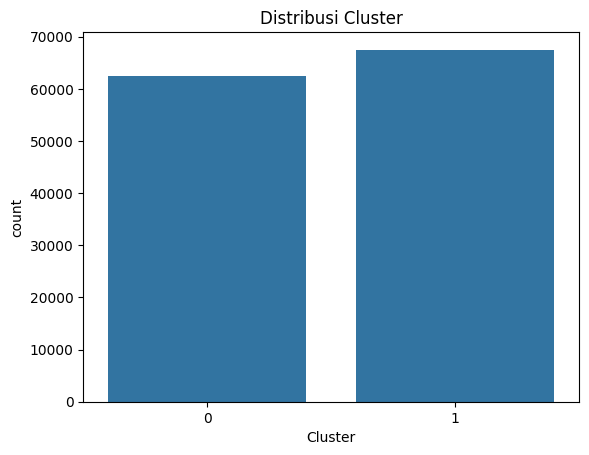

In [ ]:
# Tambahkan label cluster ke dataframe
df_clustered = df_prepro.copy()
df_clustered['Cluster'] = clusters

# Analisis hasil clustering
print("\nDistribusi Cluster:")
cluster_counts = df_clustered['Cluster'].value_counts().sort_index()
print(cluster_counts)

pl = sns.countplot(x=df_clustered["Cluster"])
pl.set_title("Distribusi Cluster")
plt.show()


In [ ]:
# Karakteristik setiap cluster
print("\n=== KARAKTERISTIK SETIAP CLUSTER ===")

# Use the numerical column names for calculating mean
numerical_features_for_mean = df_prepro.select_dtypes(include=['number']).columns.tolist()
# Exclude the target variable 'satisfaction' if it's still in numerical_cols
if 'satisfaction' in numerical_features_for_mean:
    numerical_features_for_mean.remove('satisfaction')


cluster_characteristics = df_clustered.groupby('Cluster')[numerical_features_for_mean].mean()
print("\nRata-rata fitur per cluster (data asli):")
print(cluster_characteristics.round(2))


=== KARAKTERISTIK SETIAP CLUSTER ===

Rata-rata fitur per cluster (data asli):
           Age  Flight Distance  Inflight wifi service  \
Cluster                                                  
0        37.36           945.79                   2.31   
1        41.34          1416.25                   3.12   

         Departure/Arrival time convenient  Ease of Online booking  \
Cluster                                                              
0                                     2.96                    2.48   
1                                     3.15                    3.01   

         Gate location  Food and drink  Online boarding  Seat comfort  \
Cluster                                                                 
0                 2.94            2.49             2.59          2.62   
1                 3.01            3.86             3.86          4.20   

         Inflight entertainment  On-board service  Leg room service  \
Cluster                                   

In [ ]:
cluster_characteristics.round(2)

Age  Flight Distance  Inflight wifi service  \
Cluster                                                  
0        37.36           945.79                   2.31   
1        41.34          1416.25                   3.12   

         Departure/Arrival time convenient  Ease of Online booking  \
Cluster                                                              
0                                     2.96                    2.48   
1                                     3.15                    3.01   

         Gate location  Food and drink  Online boarding  Seat comfort  \
Cluster                                                                 
0                 2.94            2.49             2.59          2.62   
1                 3.01            3.86             3.86          4.20   

         Inflight entertainment  On-board service  Leg room service  \
Cluster                                                               
0                          2.34              2.79              2.87   
1                          4.30              3.93              3.80   

         Baggage handling  Checkin service  Inflight service  Cleanliness  \
Cluster                                                                     
0                    3.15             2.94              3.15         2.46   
1                    4.08             3.65              4.10         4.05   

         Departure Delay in Minutes  Arrival Delay in Minutes  
Cluster                                                        
0                             16.92                     17.51  
1                             12.67                     12.85

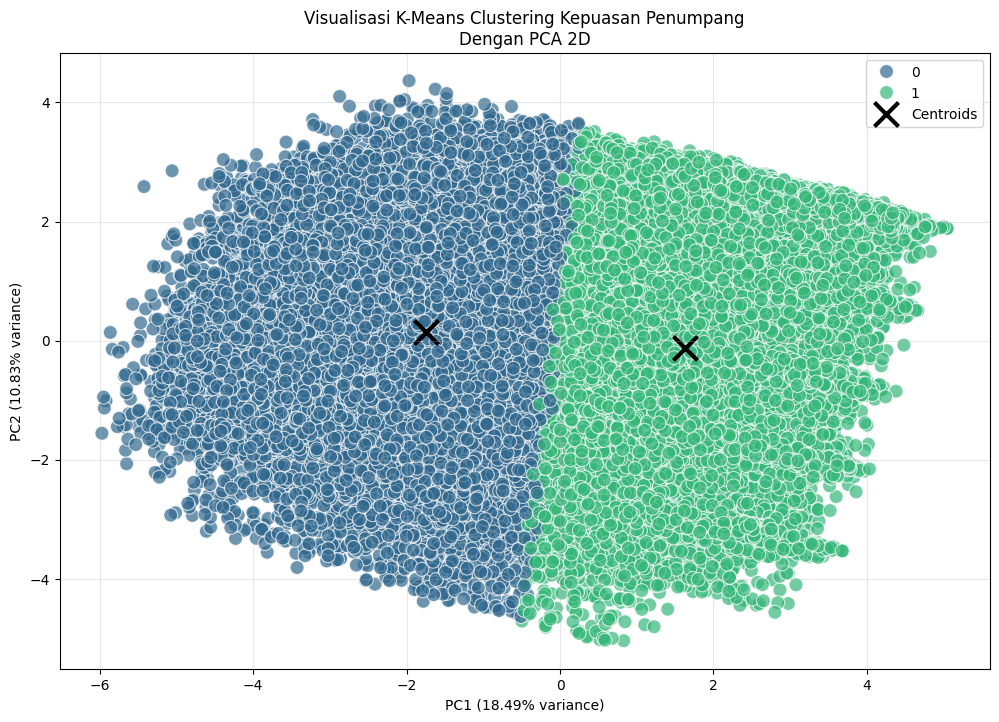


Total variance explained oleh 2 komponen PCA: 29.32%


In [ ]:
# Visualisasi clustering menggunakan PCA
# Objek pca di-fit di sini, jadi explained_variance_ratio_ akan tersedia
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X) # X_pca adalah hasil transformasi

# Buat DataFrame untuk visualisasi Seaborn
# Gunakan X_pca (numpy array) dan label cluster dari K-Means (clusters)
df_pca_kmeans = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca_kmeans['Cluster'] = clusters # Tambahkan label cluster K-Means

plt.figure(figsize=(12, 8)) # Gunakan ukuran yang sama dengan plot K-Means sebelumnya

# Plot titik data menggunakan seaborn.scatterplot
# data: DataFrame yang baru dibuat
# x, y: Kolom PC1 dan PC2
# hue: Kolom Cluster untuk mewarnai titik
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='Cluster',
    data=df_pca_kmeans,
    palette='viridis', # Anda bisa pilih palet warna seaborn yang disukai
    s=100, # Ukuran titik
    alpha=0.7, # Transparansi
    legend="full" # Tampilkan legenda penuh
)

# Plot centroids
# Transform centroids K-Means dari ruang asli ke ruang PCA
centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1],
           c='black', marker='x', s=300, linewidths=3, label='Centroids')

# Tambahkan judul dan label
plt.title('Visualisasi K-Means Clustering Kepuasan Penumpang\nDengan PCA 2D') # Sesuaikan judul
# Akses explained_variance_ratio_ dari objek pca yang sudah di-fit
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')

plt.legend() # Menampilkan legenda untuk scatterplot seaborn dan plot centroid
plt.grid(True, alpha=0.3)
plt.show()

# Cetak total variance explained
print(f"\nTotal variance explained oleh 2 komponen PCA: {sum(pca.explained_variance_ratio_):.2%}")

### Gaussian Mixture

In [ ]:
from sklearn.mixture import GaussianMixture
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Asumsikan 'X_pca' adalah data 2D hasil PCA Anda dari langkah sebelumnya

# 1. Inisialisasi dan jalankan GMM
# Kita tahu ada 2 kelompok dari ground truth, jadi n_components=2
gmm = GaussianMixture(n_components=2, random_state=42)
gmm_clusters = gmm.fit_predict(df_pca)

# 2. Visualisasikan Hasil Clustering GMM
df_pca_gmm = pd.DataFrame(data=df_pca, columns=['PC1', 'PC2'])
df_pca_gmm['Cluster'] = gmm_clusters

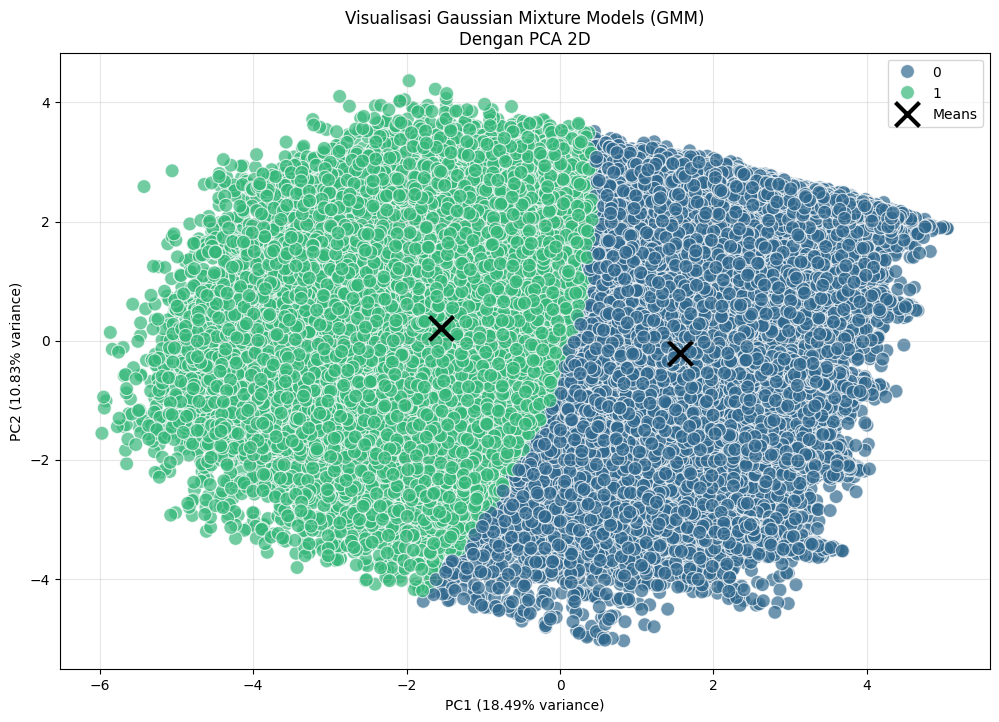


Total variance explained oleh 2 komponen PCA: 29.32%


In [ ]:
from sklearn.mixture import GaussianMixture
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA # Pastikan diimpor

# --- Visualisasi Clustering GMM menggunakan PCA ---

# BUAT DAN FIT OBJEK PCA DI SINI PADA DATA ASLI (X)
# Ini penting agar explained_variance_ratio_ tersedia dan transform konsisten
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X) # Fit PCA pada data asli yang dinormalisasi

# 1. Inisialisasi dan jalankan GMM PADA DATA PCA
# Gunakan X_pca yang baru saja dibuat di sini
gmm = GaussianMixture(n_components=2, random_state=42)
gmm_clusters = gmm.fit_predict(X_pca) # <-- Latih GMM pada data hasil PCA

# Buat DataFrame untuk visualisasi Seaborn
# Gunakan X_pca (numpy array) dan label cluster dari GMM (gmm_clusters)
df_pca_gmm = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca_gmm['Cluster'] = gmm_clusters # Tambahkan label cluster GMM

plt.figure(figsize=(12, 8)) # Gunakan ukuran yang sama untuk konsistensi

# Plot titik data menggunakan seaborn.scatterplot
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='Cluster',
    data=df_pca_gmm,
    palette='viridis', # Anda bisa pilih palet warna seaborn yang disukai
    s=100, # Ukuran titik
    alpha=0.7, # Transparansi
    legend="full" # Tampilkan legenda penuh
)

# Plot Means GMM
# Means GMM sudah dalam ruang PCA karena GMM dilatih pada X_pca
means = gmm.means_
plt.scatter(means[:, 0], means[:, 1],
           c='black', marker='x', s=300, linewidths=3, label='Means') # Label Centroids atau Means

# Tambahkan judul dan label
plt.title('Visualisasi Gaussian Mixture Models (GMM)\nDengan PCA 2D') # Sesuaikan judul
# Akses explained_variance_ratio_ dari objek pca yang sudah di-fit di blok ini
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')

plt.legend() # Menampilkan legenda untuk scatterplot seaborn dan plot means
plt.grid(True, alpha=0.3)
plt.show()

# Cetak total variance explained
print(f"\nTotal variance explained oleh 2 komponen PCA: {sum(pca.explained_variance_ratio_):.2%}")


Distribusi Cluster:
Cluster
0    65006
1    64874
Name: count, dtype: int64


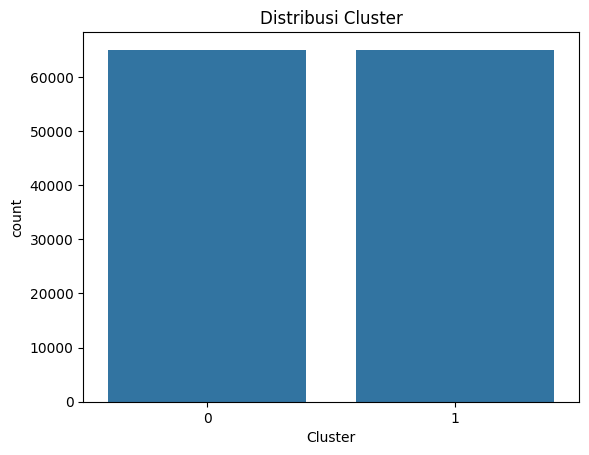

In [ ]:
# Analisis hasil clustering
print("\nDistribusi Cluster:")
cluster_counts = df_pca_gmm['Cluster'].value_counts().sort_index()
print(cluster_counts)

pl = sns.countplot(x=df_pca_gmm["Cluster"])
pl.set_title("Distribusi Cluster")
plt.show()

In [ ]:
# Tambahkan label cluster ke dataframe
df_clustered_gmm = df_prepro.copy()
df_clustered_gmm['Cluster'] = gmm_clusters

# Karakteristik setiap cluster
print("\n=== KARAKTERISTIK SETIAP CLUSTER ===")

# Use the numerical column names for calculating mean
numerical_features_for_mean = df_clustered_gmm.select_dtypes(include=['number']).columns.tolist()
# Exclude the target variable 'satisfaction' if it's still in numerical_cols
if 'satisfaction' in numerical_features_for_mean:
    numerical_features_for_mean.remove('satisfaction')


cluster_characteristics = df_clustered_gmm.groupby('Cluster')[numerical_features_for_mean].mean()
print("\nRata-rata fitur per cluster (data asli):")
print(cluster_characteristics.round(2))


=== KARAKTERISTIK SETIAP CLUSTER ===

Rata-rata fitur per cluster (data asli):
           Age  Flight Distance  Inflight wifi service  \
Cluster                                                  
0        41.32          1439.53                   3.06   
1        37.54           940.60                   2.40   

         Departure/Arrival time convenient  Ease of Online booking  \
Cluster                                                              
0                                     3.08                    2.94   
1                                     3.04                    2.57   

         Gate location  Food and drink  Online boarding  Seat comfort  \
Cluster                                                                 
0                 2.97            3.88             3.84          4.23   
1                 2.99            2.53             2.66          2.65   

         Inflight entertainment  On-board service  Leg room service  \
Cluster                                   

In [ ]:
cluster_characteristics.round(2)

Age  Flight Distance  Inflight wifi service  \
Cluster                                                  
0        41.32          1439.53                   3.06   
1        37.54           940.60                   2.40   

         Departure/Arrival time convenient  Ease of Online booking  \
Cluster                                                              
0                                     3.08                    2.94   
1                                     3.04                    2.57   

         Gate location  Food and drink  Online boarding  Seat comfort  \
Cluster                                                                 
0                 2.97            3.88             3.84          4.23   
1                 2.99            2.53             2.66          2.65   

         Inflight entertainment  On-board service  Leg room service  \
Cluster                                                               
0                          4.33              3.96              3.83   
1                          2.38              2.80              2.87   

         Baggage handling  Checkin service  Inflight service  Cleanliness  \
Cluster                                                                     
0                    4.11             3.67              4.13         4.07   
1                    3.15             2.94              3.15         2.50   

         Departure Delay in Minutes  Arrival Delay in Minutes  Cluster  
Cluster                                                                 
0                             12.47                     12.64      0.0  
1                             16.96                     17.54      1.0

In [ ]:
from sklearn.metrics import silhouette_score, adjusted_rand_score, davies_bouldin_score, calinski_harabasz_score
import numpy as np
import pandas as pd
import warnings

# Suppress potential future warnings from sklearn
warnings.filterwarnings('ignore')

# --- Evaluasi Kualitas GMM Clustering ---
print("\n=== EVALUASI KUALITAS GMM CLUSTERING ===")

# Menggunakan df_pca (data 2D hasil PCA) dan gmm_clusters (hasil gmm.fit_predict)
# Serta y (label ground truth)

# 1. Metrik Model Probabilistik
try:
    log_likelihood = gmm.score(df_pca) # Rata-rata log-likelihood per sampel
    print(f"Average Log-Likelihood: {log_likelihood:.4f} (semakin tinggi semakin baik)")

    aic = gmm.aic(df_pca)
    print(f"AIC: {aic:.4f} (semakin rendah semakin baik)")

    bic = gmm.bic(df_pca)
    print(f"BIC: {bic:.4f} (semakin rendah semakin baik)")

except Exception as e:
    print(f"Tidak dapat menghitung Metrik Model Probabilistik: {e}")


# 2. Metrik Berbasis Hard Assignment (Mirip dengan Evaluasi K-Means)
print("\n--- Metrik Berbasis Hard Assignment ---")

# Pastikan minimal 2 cluster dan setidaknya 2 sampel untuk metrik ini
if len(set(gmm_clusters)) > 1 and len(gmm_clusters) > 1:
    # Adjusted Rand Index (vs Ground Truth)
    try:
        if len(set(y)) > 1:
            ari = adjusted_rand_score(y, gmm_clusters)
            print(f"Adjusted Rand Index (vs Ground Truth): {ari:.4f} (semakin dekat ke 1 semakin baik)")
        else:
            print("Tidak dapat menghitung Adjusted Rand Index: hanya 1 kelas ground truth")
    except Exception as e:
         print(f"Tidak dapat menghitung Adjusted Rand Index: {e}")

    # Silhouette Score
    try:
         silhouette_avg = silhouette_score(df_pca, gmm_clusters) # Menggunakan data PCA
         print(f"Silhouette Score: {silhouette_avg:.4f} (semakin tinggi semakin baik, range: [-1, 1])")
    except Exception as e:
        print(f"Tidak dapat menghitung Silhouette Score: {e}")

    # Davies-Bouldin Index
    try:
        db_index = davies_bouldin_score(df_pca, gmm_clusters) # Menggunakan data PCA
        print(f"Davies-Bouldin Index: {db_index:.4f} (semakin rendah semakin baik)")
    except Exception as e:
        print(f"Tidak dapat menghitung Davies-Bouldin Index: {e}")

    # Calinski-Harabasz Index
    try:
        ch_index = calinski_harabasz_score(df_pca, gmm_clusters) # Menggunakan data PCA
        print(f"Calinski-Harabasz Index: {ch_index:.4f} (semakin tinggi semakin baik)")
    except Exception as e:
         print(f"Tidak dapat menghitung Calinski-Harabasz Index: {e}")

else:
    print("Tidak dapat menghitung metrik berbasis hard assignment: hanya 1 cluster atau kurang dari 2 sampel")


# --- Analisis Tambahan (Opsional) ---
print("\n=== ANALISIS CROSSTAB GMM CLUSTER vs SATISFACTION ===")
try:
    crosstab_gmm = pd.crosstab(gmm_clusters, y) # Menggunakan gmm_clusters dan y secara langsung
    print(crosstab_gmm)
except Exception as e:
    print(f"Tidak dapat membuat Crosstab: {e}")


=== EVALUASI KUALITAS GMM CLUSTERING ===
Average Log-Likelihood: -3.9294 (semakin tinggi semakin baik)
AIC: 1020732.9542 (semakin rendah semakin baik)
BIC: 1020840.4722 (semakin rendah semakin baik)

--- Metrik Berbasis Hard Assignment ---
Adjusted Rand Index (vs Ground Truth): 0.2926 (semakin dekat ke 1 semakin baik)
Silhouette Score: 0.3863 (semakin tinggi semakin baik, range: [-1, 1])
Davies-Bouldin Index: 1.0185 (semakin rendah semakin baik)
Calinski-Harabasz Index: 101949.4776 (semakin tinggi semakin baik)

=== ANALISIS CROSSTAB GMM CLUSTER vs SATISFACTION ===
satisfaction      0      1
row_0                     
0             19195  45811
1             54257  10617
